# Breast Cancer Wisconsin (Diagnostic) Classification

## Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

## Split Dataset into Train and Test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

## Train and Evaluate Model

### k-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

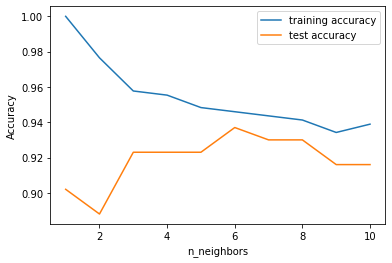

In [9]:
from matplotlib import pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="lbfgs", max_iter=100000)
lr_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr_model.score(X_test, y_test)))
print("Number of iterations: {}".format(lr_model.n_iter_))

Training set score: 0.979
Test set score: 0.944
Number of iterations: [1846]


In [11]:
lr_model100 = LogisticRegression(C=100, solver="lbfgs", max_iter=100000)
lr_model100.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr_model100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr_model100.score(X_test, y_test)))
print("Number of iterations: {}".format(lr_model100.n_iter_))

Training set score: 0.986
Test set score: 0.965
Number of iterations: [8403]


In [12]:
lr_model001 = LogisticRegression(C=0.01, solver="lbfgs", max_iter=100000)
lr_model001.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr_model001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr_model001.score(X_test, y_test)))
print("Number of iterations: {}".format(lr_model001.n_iter_))

Training set score: 0.960
Test set score: 0.937
Number of iterations: [388]


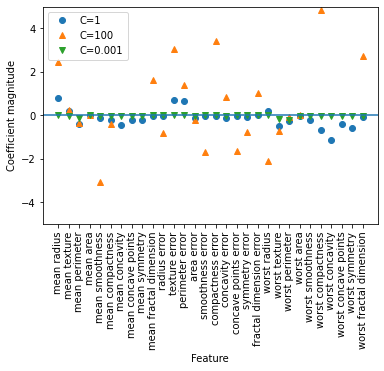

In [13]:
plt.plot(lr_model.coef_.T, 'o', label="C=1")
plt.plot(lr_model100.coef_.T, '^', label="C=100")
plt.plot(lr_model001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()